Device: Crsytallmaker 4000
Temperature Values: [-73.02465854007033, -73.1394330600218, -73.0457336791376, -73.08098269728619, -73.21077140604666, -73.10093709725419, -73.21522162478931, -73.15069938731433, -72.96350394292297, -73.08101519628309, -73.27014395891686, -73.19844135890852, -73.15014392875761, -72.95874896120375, -73.00485062997738, -73.03982816349091, -72.97371246238266, -73.15451702561667, -73.02739951227348, -73.07386572331559]

Device: Mixer 2000
Temperature Values: [24.85893934862706, 25.010933592826408, 24.84671635063064, 24.823232365601516, 24.87562231868541, 24.84214463271937, 25.180823547095496, 25.162391816849134, 25.134750934996408, 24.88373259265008, 24.970262044621766, 25.188785110814646, 25.194394834024546, 24.93106063257136, 25.02004204028723, 25.13212892173694, 25.18341435756764, 24.925526653205573, 25.12145206971728, 25.15073921996622]



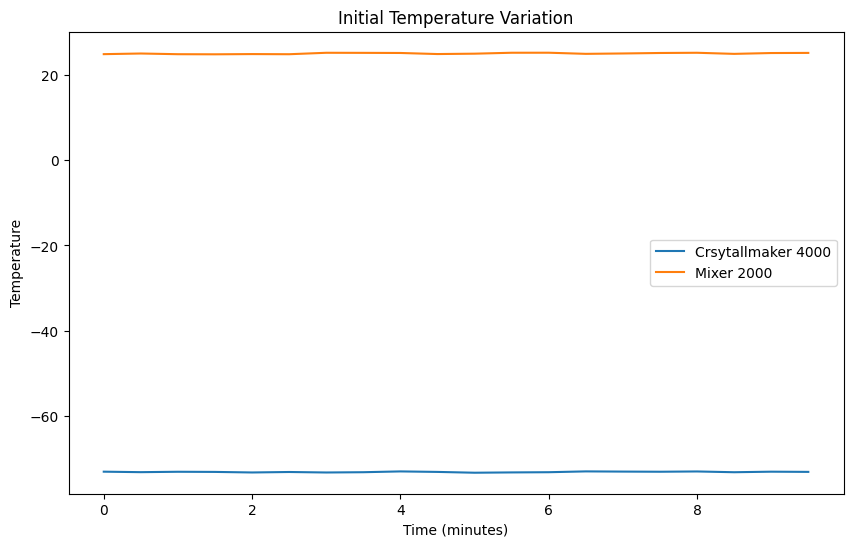

Select a device by entering its corresponding number:
1. Crsytallmaker 4000
2. Mixer 2000
Enter the number of the device: 2
Enter the new temperature for Mixer 2000: 45
Selected Device: Mixer 2000
New Temperature: 45.0
Device: Crsytallmaker 4000
Temperature Values: [-73.02465854007033, -73.1394330600218, -73.0457336791376, -73.08098269728619, -73.21077140604666, -73.10093709725419, -73.21522162478931, -73.15069938731433, -72.96350394292297, -73.08101519628309, -73.27014395891686, -73.19844135890852, -73.15014392875761, -72.95874896120375, -73.00485062997738, -73.03982816349091, -72.97371246238266, -73.15451702561667, -73.02739951227348, -73.07386572331559, -73.07386572331559, -73.07386572331559, -73.07386572331559, -73.07386572331559, -73.07386572331559, -73.07386572331559, -73.07386572331559, -73.07386572331559]

Device: Mixer 2000
Temperature Values: [24.85893934862706, 25.010933592826408, 24.84671635063064, 24.823232365601516, 24.87562231868541, 24.84214463271937, 25.180823547095496

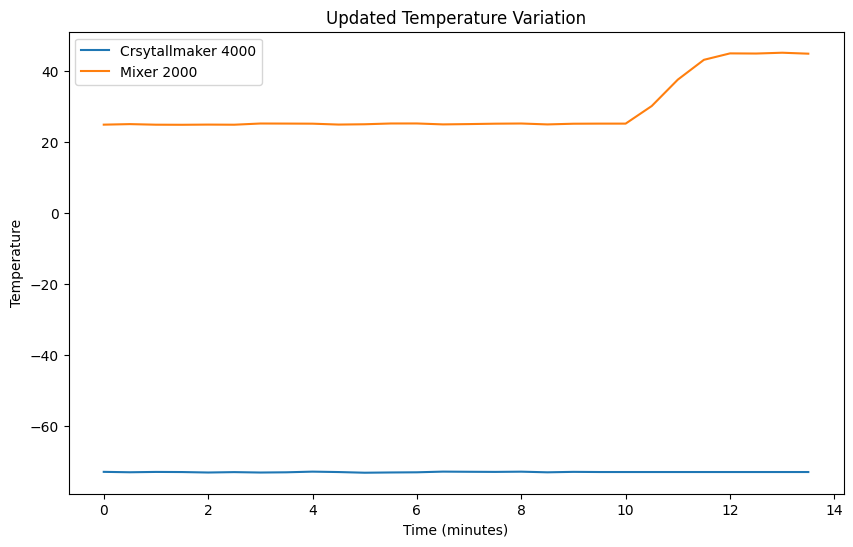

In [124]:
import xml.etree.ElementTree as ET
import random
from datetime import timedelta

# Load the XML content (replace 'your_file.xml' with the path to your XML file)
with open('/content/3unitoperation_temperature.xml', 'r') as xml_file:
    xml_content = xml_file.read()

# Parse the XML content
root = ET.fromstring(xml_content)

# Define observation time and initial time step
observation_time = timedelta(minutes=10)
time_step = timedelta(seconds=30)

# Function to simulate temperature measurements
def simulate_temperature_measurement(temperature):
    noise = random.uniform(-0.2, 0.2)  # Simulate small random fluctuations
    return temperature + noise

# Initialize a list to store device information and temperature value lists
device_data_list = []

# Iterate through UnitOperation elements
for unit_operation in root.findall('.//UnitOperation'):
    temperature_element = unit_operation.find('.//Temperature')
    device_element = unit_operation.find('.//device')

    if device_element is not None:
        device = device_element.text.strip()
    else:
        device = "Unknown Device"

    if temperature_element is not None:
        temperature_text = temperature_element.text.strip()
        if 'Celsius' in temperature_text:
            starting_temperature = float(temperature_text.split()[0])  # Extract numeric value from temperature in Celsius
        elif temperature_text.endswith('°C'):
            starting_temperature = float(temperature_text[:-2])  # Remove '°C' and convert to float
        elif temperature_text.endswith('Kelvin'):
            kelvin_temp = float(temperature_text.split()[0])  # Extract numeric value from temperature in Kelvin
            starting_temperature = kelvin_temp - 273.15  # Convert Kelvin to Celsius

        # Initialize temperature value list for the device
        temp_values = []

        # Simulate temperature measurements based on observation time and time step
        current_time = timedelta(seconds=0)
        while current_time < observation_time:
            simulated_temperature = simulate_temperature_measurement(starting_temperature)
            temp_values.append(simulated_temperature)
            current_time += time_step

        # Append device information and temperature value list as a tuple to the list
        device_data_list.append((device, temp_values))

# Print temperature value list of each device
for device, temp_values in device_data_list:
    print(f"Device: {device}")
    print(f"Temperature Values: {temp_values}")
    print()



# Plot initial temperature values for each device
plt.figure(figsize=(10, 6))
for device, temp_values in device_data_list:
    plt.plot([i * time_step.total_seconds() / 60 for i in range(len(temp_values))], temp_values, label=device)

plt.xlabel('Time (minutes)')
plt.ylabel('Temperature')
plt.title('Initial Temperature Variation')
plt.legend()
plt.show()


# Display device list with numbers
print("Select a device by entering its corresponding number:")
for i, (device, _) in enumerate(device_data_list, start=1):
    print(f"{i}. {device}")

# Prompt user to select a device
selected_device_number = int(input("Enter the number of the device: ")) - 1
selected_device, _ = device_data_list[selected_device_number]

# Prompt user for new temperature
new_temperature = float(input(f"Enter the new temperature for {selected_device}: "))

# Print selected device and new temperature
print(f"Selected Device: {selected_device}")
print(f"New Temperature: {new_temperature}")


# Add 4 minutes to the observation time
observation_time += timedelta(minutes=4)

# Calculate the number of time steps for the adjusted temperature phase (2 minutes)
adjusted_time_steps = int(timedelta(minutes=2) / time_step)

# Adjust temperatures for the selected device
for i, (device, temp_values) in enumerate(device_data_list):
    if device == selected_device:
        # Simulate the rise or fall to the new temperature in the first 2 minutes
        for j in range(adjusted_time_steps):
            fraction_complete = j / adjusted_time_steps
            adjusted_temperature = temp_values[-1] + (new_temperature - temp_values[-1]) * fraction_complete
            temp_values.append(adjusted_temperature)

        # Simulate stable temperature in the remaining 2 minutes
        for j in range(adjusted_time_steps, 2 * adjusted_time_steps):
            temp_values.append(simulate_temperature_measurement(new_temperature))
    else:
        # Extend the temperature values list for unselected devices
        temp_values.extend([temp_values[-1]] * (2 * adjusted_time_steps))

# Print temperature value list of each device
for device, temp_values in device_data_list:
    print(f"Device: {device}")
    print(f"Temperature Values: {temp_values}")
    print()

plt.figure(figsize=(10, 6))
for device, temp_values in device_data_list:
    plt.plot([i * time_step.total_seconds() / 60 for i in range(len(temp_values))], temp_values, label=device)

plt.xlabel('Time (minutes)')
plt.ylabel('Temperature')
plt.title('Updated Temperature Variation')
plt.legend()
plt.show()

# Neuer Abschnitt